In [15]:
import time 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [25]:
data = [0]
t = [0]

In [39]:
def add_data_point(data, time):
    start_time = 1717357531
    current_time = time.time()
    delta_time = (current_time-start_time)/3600
    n_jobs = 810
    out = open('out.txt').read()
    out_split = out.split()
    df_out = pd.DataFrame(data=out_split)
    # index = df_out[df_out[0] == 'rfc'].index[0]
    # df_trimmed = df_out.iloc[index:]
    solved_models = df_out.value_counts()['[CV]']
    print(f"Progress: {round(100*solved_models/n_jobs, 1)}%\n"
         
         )
    if delta_time - t[-1]>0.2:
        data.append(solved_models)
        t.append(delta_time)

    avg_models_per_hour = (data[-1]-data[-2])/(t[-1]-t[-2])
    estiamted_completion = current_time + 3600*(n_jobs - data[-1])/avg_models_per_hour

    print(datetime.fromtimestamp(estiamted_completion))
    
    fig, ax = plt.subplots()
    
    plt.plot(t, data, marker='x', label='models solved')
    plt.axhline(y=n_jobs, color='red', label='total models')
    plt.xlabel('time (hours)')
    plt.ylabel('Models solved')
    plt.title('Progress of models grid search over time')
    plt.ylim(0, n_jobs*1.1)
    plt.legend()

    

Progress: 88.5%

2024-06-04 05:38:51.527531


([0,
  4.274272164702415,
  5.7548765977885985,
  15.230073993603389,
  16.040863393611378,
  17.67927683889866,
  20.81412830306424,
  26.864809267454678],
 [0, 177, 223, 485, 505, 545, 605, 717])

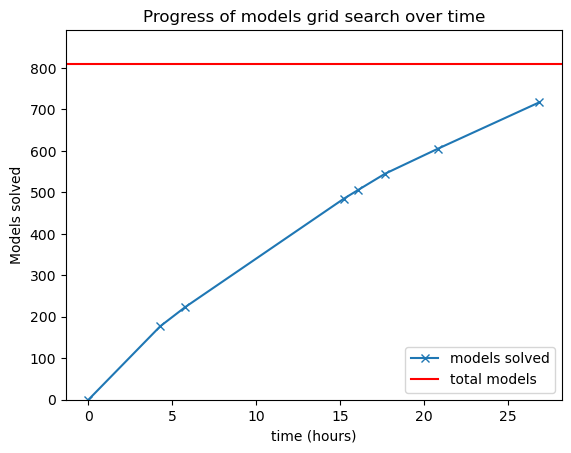

In [48]:
add_data_point(data, time)
t, data

In [41]:
t, data

([0, 4.274272164702415], [0, 177])